# Evaluar el modelo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
session = tf.Session()

## 1- Caso de regresión

In [2]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(10.0, 200)

x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

batch_size = 25

In [3]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8),replace=False)

In [4]:
train_idx

array([ 73,  70, 199, 139, 108,  20, 172,  36,  24,  32, 168,  45,  54,
       130,  26,  87,  98, 110,  83, 136, 125, 134,  17, 121,  49, 170,
        78,   6,  86, 188, 107,  74, 109,  61,  42,  21,  48,   9, 123,
        30, 126,  69, 152,  35, 149,  53, 103,  88, 156, 141,  84,  82,
       174, 190, 182,  13, 102, 189,  62,  19, 183, 151,   4, 129,  38,
       106, 127,   8, 175,   7,  80,  67, 164, 176, 124,  43,  89, 193,
        52,  92, 113, 187, 155, 117,  91,  55,  37,  99,   2,  47,  68,
       192, 162, 165, 198,  51, 111,  29,  14, 122,  44,  63, 161,  93,
        28, 115,  64,  65,  71,  31,  95, 104, 194,  79, 159, 144, 177,
        34,  94, 133,  66, 112,  81,  11, 166,  16,  50, 132,  12,   1,
       191,  25, 143, 180,  57, 119,  85, 148, 178, 150, 195, 142,  60,
       100, 196, 154,  33,  58,  41, 140,  15, 145,  18, 186,  39,  90,
       135, 167,  72, 116])

In [5]:
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [6]:
test_idx

array([  0, 128,   3, 131,   5, 137,  10, 138, 146, 147,  22,  23, 153,
        27, 157, 158, 160, 163,  40, 169, 171, 173,  46, 179, 181,  56,
       184, 185,  59, 197,  75,  76,  77,  96,  97, 101, 105, 114, 118, 120])

In [7]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [10]:
my_prediction = tf.matmul(x_data, A)
loss = tf.reduce_mean(tf.square(my_prediction-y_target))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_optim.minimize(loss)
init = tf.initialize_all_variables()
session.run(init)

In [11]:
for i in range(200):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    if (i+1)%20==0:
        print('Paso #'+str(i+1)+ ", A="+str(session.run(A))+", Loss ="+
              str(session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})))

Paso #20, A=[[ 5.90453386]], Loss =15.5265
Paso #40, A=[[ 8.16073895]], Loss =4.43926
Paso #60, A=[[ 9.15259647]], Loss =1.73033
Paso #80, A=[[ 9.54181862]], Loss =1.16475
Paso #100, A=[[ 9.71545696]], Loss =1.3502
Paso #120, A=[[ 9.79793453]], Loss =1.23264
Paso #140, A=[[ 9.86874294]], Loss =1.4994
Paso #160, A=[[ 9.8543663]], Loss =1.05899
Paso #180, A=[[ 9.86473846]], Loss =0.568803
Paso #200, A=[[ 9.84924603]], Loss =0.845854


#### Evaluación del modelo con MSE

* **Para evaluar los modelos de regresion lineal se saca la diferencia del valor real y el pronosticado **
* **Para la evaluacion del modelo se usa el x_vals_train completo, no batch**

In [12]:
mse_train = session.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
mse_test = session.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
print("MSE en el conjunto de entrenamiento "+str(np.round(mse_train, 3)))
print("MSE en el conjunto de testing "+str(np.round(mse_test, 3)))

MSE en el conjunto de entrenamiento 0.828
MSE en el conjunto de testing 1.051


## 2- Caso de clasificación

In [13]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [14]:
batch_size = 25
x_vals = np.concatenate((np.random.normal(-2,1,100), np.random.normal(2,1,100)))
y_vals = np.concatenate((np.repeat(0.0, 100), np.repeat(1.0,100)))

x_data = tf.placeholder(shape=[1,None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1,None], dtype = tf.float32)

In [15]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [18]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [19]:
my_prediction = tf.add(x_data, A)
init = tf.initialize_all_variables()
session.run(init)

In [25]:
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_prediction,targets=y_target))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = my_optim.minimize(xentropy)

In [26]:
for i in range(2000):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_idx]]
    rand_y = [y_vals_train[rand_idx]]
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+
             "Loss = "+str(session.run(xentropy, feed_dict={x_data: rand_x, y_target:rand_y})))

Paso #100, A = [ 7.17884302]Loss = 2.01746
Paso #200, A = [ 4.59405279]Loss = 1.83752
Paso #300, A = [ 2.56220174]Loss = 0.514735
Paso #400, A = [ 1.3716718]Loss = 0.234336
Paso #500, A = [ 0.75246829]Loss = 0.161181
Paso #600, A = [ 0.40996107]Loss = 0.216535
Paso #700, A = [ 0.18447691]Loss = 0.123945
Paso #800, A = [ 0.04826102]Loss = 0.219685
Paso #900, A = [ 0.00320262]Loss = 0.214184
Paso #1000, A = [-0.04495031]Loss = 0.137955
Paso #1100, A = [-0.07263669]Loss = 0.171695
Paso #1200, A = [-0.08465409]Loss = 0.163899
Paso #1300, A = [-0.09902194]Loss = 0.156013
Paso #1400, A = [-0.09217661]Loss = 0.171605
Paso #1500, A = [-0.09589168]Loss = 0.281187
Paso #1600, A = [-0.09611145]Loss = 0.135065
Paso #1700, A = [-0.08215883]Loss = 0.182959
Paso #1800, A = [-0.10256741]Loss = 0.178695
Paso #1900, A = [-0.1044545]Loss = 0.144551
Paso #2000, A = [-0.0961098]Loss = 0.213461


#### Evaluar el modelo con la precisión (Accuracy)

* **Para la evaluacion de modelos de regresion logistica se verifica si el pronostico es igual a valor real**
* **Para la evaluacion del modelo se usa el x_vals_train completo, no batch**

In [27]:
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [28]:
acc_train = session.run(accuracy, feed_dict={x_data:[x_vals_train], y_target: [y_vals_train]})
acc_test = session.run(accuracy, feed_dict={x_data:[x_vals_test], y_target: [y_vals_test]})

In [29]:
print("Precisión en el conjunto de entrenamiento: "+str(acc_train))
print("Precisión en el conjunto de testing: "+ str(acc_test))

Precisión en el conjunto de entrenamiento: 0.975
Precisión en el conjunto de testing: 0.975


#### Visualización de los modelos

In [30]:
A_result = session.run(A)
A_result

array([-0.0961098], dtype=float32)

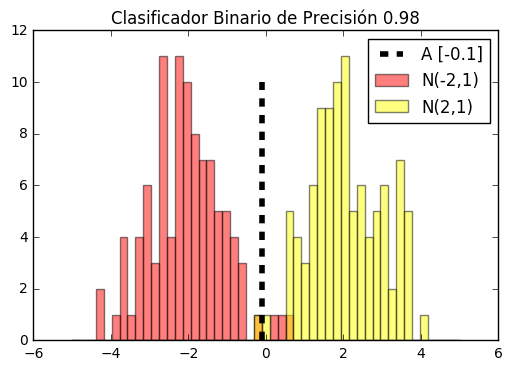

In [31]:
bins = np.linspace(-5,5,50)
plt.hist(x_vals[0:100], bins, alpha=0.5, label = "N(-2,1)", color="red")
plt.hist(x_vals[100:200], bins, alpha=0.5, label="N(2,1)", color="yellow")
plt.plot((A_result, A_result), (0, 10), "k--", linewidth = 4, label = "A "+str(np.round(A_result,2)))
plt.legend(loc="upper right")
plt.title("Clasificador Binario de Precisión "+str(np.round(acc_train,2)))
plt.show()